Library for data analysis


In [1]:
import pandas as pd
import numpy as np

Libraries for Plotting or say an initial visualization of data


In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Library to get the proper data segregation between Training set, validation set and testing set

In [3]:
from sklearn.model_selection import train_test_split as dataSplit

Library for preprocessing of the data.
preprocessing tasks:
1. Setting the dispersed values into a range.
2. Giving a proper ncoding to 

In [4]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

Importing the regression library LogisticRegression

In [5]:
from sklearn.linear_model import LogisticRegression as LR

Library to analyze the results given by the model

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score


     |████████████████████████████████| 66 kB 2.2 MB/s 


Load the excel file provided as dataset and converting into pandas dataframe 

In [8]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data_for_IIS_Lab_ Assignment.xlsx")
df

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,0
3994,752781,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0
3995,355888,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1
3996,947111,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,0


Collecting the Information that is there any blank value in the data frame or not. if we don't get any value as NAN then we can process normally otherwise we have to drop those NAN value for inital visuaization using plotting otherwise they wiil through error.

In our dataset there is no NAN that means no null value as we can see in following result of  df.info command we have all 3998 value non null in all features. so we will be processing normally without preprocessing the data for  setting the null values or dropping them.

In [9]:
px.scatter(df, 
             x='10percentage',
             y='12percentage', 
             title='10-percentage vs. 12-percentage', 
             color='High-Salary')

In [10]:
px.histogram(df, 
             x='CollegeState', 
            #  y= '12board',
             title='10board vs. 12board', 
             color='High-Salary')

In [11]:
px.histogram(df, 
             x='CollegeTier',
             title='CollegeTier vs. Count', 
             color='High-Salary')

In [12]:
px.scatter(df, 
           x='Specialization', 
           title='Specialization vs Count', 
           color='High-Salary')

In [13]:
px.histogram(df, 
             x='collegeGPA', 
             title='collegeGPA vs Count', 
             color='High-Salary')

In [14]:
px.histogram(df, 
           title='DOB vs. Count',
           x='DOB',
           color='High-Salary')

In [15]:
px.histogram(df, 
           title='CollegeTier vs. Count',
           x='CollegeTier',
           color='High-Salary')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   10board                3998 non-null   object        
 5   12graduation           3998 non-null   int64         
 6   12percentage           3998 non-null   float64       
 7   12board                3998 non-null   object        
 8   CollegeID              3998 non-null   int64         
 9   CollegeTier            3998 non-null   int64         
 10  Degree                 3998 non-null   object        
 11  Specialization         3998 non-null   object        
 12  collegeGPA             3998 non-null   float64       
 13  Col

In [17]:
def drop(dataframem, drop_l):
    return dataframem.drop(drop_l, axis = 1)

In [18]:
def data_segregation(dataFrame,test_percent, randomState = 80):
  train_df, test_df = dataSplit(dataFrame, test_size = test_percent/100, random_state=randomState)
  return train_df, test_df

In [19]:
def getIpOp(dataFrame):
  input_cols = list(dataFrame.columns)[1:-1]
  target_col = 'High-Salary'
  inputs = dataFrame[input_cols].copy()
  target = dataFrame[target_col].copy()
  return inputs, target


In [20]:
def get_cat_num(input):
  numeric_cols = input.select_dtypes(include=np.number).columns.tolist()
  categorical_cols = input.select_dtypes('object').columns.tolist()
  return numeric_cols, categorical_cols

In [21]:
def predict_and_plot(preds, targets, name=''):

    accuracy = accuracy_score(targets, preds)
    print(f"Accurcy over {name} Data:")
    print(f"Accuracy: {accuracy * 100}%")
    cf = confusion_matrix(targets, preds, normalize='true')
    print(f"Class wise Accuracy of 0: {cf[0][0]*100}")
    print(f"Class wise Accuracy of 1: {cf[1][1]*100}")
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix');    



In [22]:
df_res = pd.DataFrame()

In [23]:
def predictor(dataframe, drop_l, test_percent, random = 80):
    global df_res


    dataframe['10board'] = dataframe['10board'].replace(0,'0')
    dataframe['12board'] = dataframe['12board'].replace(0,'0')
    dataframe['DOB'] = pd.DatetimeIndex(dataframe['DOB']).year
    
    dataframe = drop(dataframe, drop_l)

    train_df, test_df = data_segregation(dataframe, test_percent, random)

    train_inputs, train_target = getIpOp(train_df)
    test_inputs, test_target = getIpOp(test_df)

    numeric_cols, categorical_cols = get_cat_num(train_inputs)

    scaler = MinMaxScaler()
    scaler.fit(dataframe[numeric_cols])


    train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
    test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoder.fit(df[categorical_cols])

    encoded_cols = list(encoder.get_feature_names(categorical_cols))

    train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
    test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
    
    features = numeric_cols + encoded_cols

    X_train = train_inputs[features]
    X_test = test_inputs[features]

    model = LR(solver='liblinear')
    model.fit(X_train, train_target)

    coef = model.coef_.tolist()
    intercept = model.intercept_.tolist()

    df_res = pd.DataFrame(features, coef)
    
    # df_res = pd.DataFrame({"Features": features, "Co-efficient": coef[0]})


    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)
    train_preds = predict_and_plot(train_preds, train_target, 'Training')
    print()

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)
    test_preds = predict_and_plot(test_preds, test_target, 'Test')
    print()

    rank  = fisher_score.fisher_score(np.array(X_train), np.array(train_target))
    df_res = pd.DataFrame({"Features": features, "rank": rank})
    


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   10board                3998 non-null   object        
 5   12graduation           3998 non-null   int64         
 6   12percentage           3998 non-null   float64       
 7   12board                3998 non-null   object        
 8   CollegeID              3998 non-null   int64         
 9   CollegeTier            3998 non-null   int64         
 10  Degree                 3998 non-null   object        
 11  Specialization         3998 non-null   object        
 12  collegeGPA             3998 non-null   float64       
 13  Col

In [25]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also


In [28]:
df_res.sort_values(
...     by="rank",
...     ascending=False,
...     kind="mergesort"
... )


,Features,rank
22,agreeableness,718
1,10percentage,717
18,ElectricalEngg,716
3,12percentage,715
12,Quant,714
6,collegeGPA,713
5,CollegeTier,712
13,Domain,711
34,10board_ap state board for secondary education,710
11,Logical,709


tester for different modification

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 74.73195139385275%
Class wise Accuracy of 0: 72.5400457665904
Class wise Accuracy of 1: 76.66442501681237

Accurcy over Test Data:
Accuracy: 72.0%
Class wise Accuracy of 0: 70.47101449275362
Class wise Accuracy of 1: 73.30246913580247



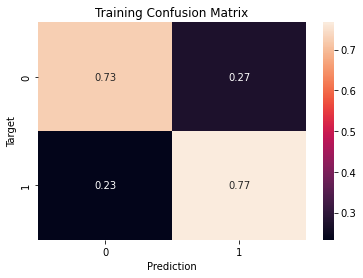

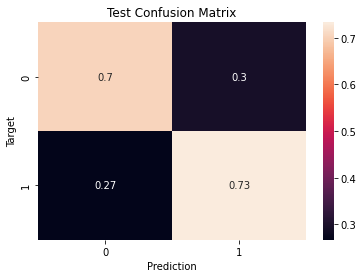

In [29]:
drop_list = []
test_percent = 30
predictor(df,drop_list, test_percent, 79)

# Accuracy achived for 30% testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 72.08720514653324%
Class wise Accuracy of 0: 69.10755148741418
Class wise Accuracy of 1: 74.71418964357768

Accurcy over Test Data:
Accuracy: 73.75%
Class wise Accuracy of 0: 71.92028985507247
Class wise Accuracy of 1: 75.30864197530865



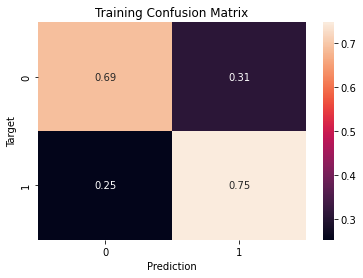

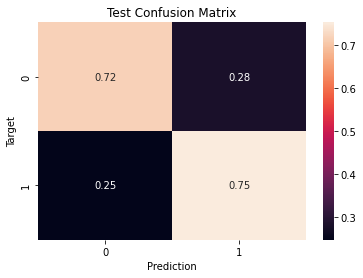

In [30]:
drop_list = ['ID', '12board', 'DOB', 'CollegeID', '10board']
test_percent = 30
predictor(df,drop_list, test_percent, 79)

# Accuracy achived for 40% testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 71.39282735613011%
Class wise Accuracy of 0: 67.79359430604983
Class wise Accuracy of 1: 74.56828885400314

Accurcy over Test Data:
Accuracy: 73.6875%
Class wise Accuracy of 0: 68.06495263870094
Class wise Accuracy of 1: 78.51335656213705



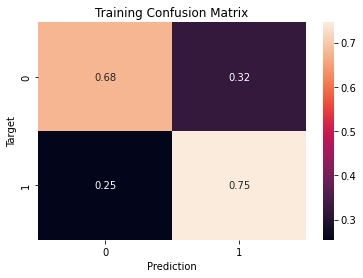

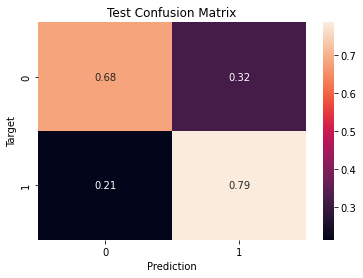

In [31]:
drop_list = ['ID', '12board', 'DOB', 'CollegeID', '10board']
test_percent = 40
predictor(df,drop_list, test_percent, 70)
# 70


# Accuracy achived for 24.5% testing

In [ ]:
drop_list = ['ID', '12board', 'DOB', 'CollegeID', '10board']
test_percent = 24.5
predictor(df,drop_list, test_percent, 79)
# 70

# Accuracy achived for 20% testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 71.85741088180112%
Class wise Accuracy of 0: 68.41046277665997
Class wise Accuracy of 1: 74.86818980667839

Accurcy over Test Data:
Accuracy: 75.25%
Class wise Accuracy of 0: 73.38709677419355
Class wise Accuracy of 1: 76.86915887850468



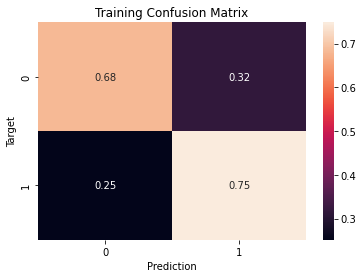

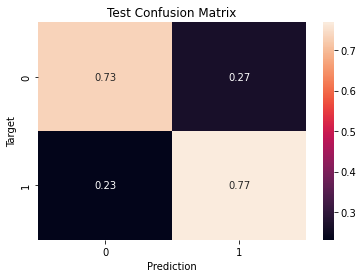

In [33]:
drop_list = ['ID', '12board', '10board']
test_percent = 20
predictor(df,drop_list, test_percent, 79)

# Accuracy achived for 20% testing with somme more drop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 71.82614133833646%
Class wise Accuracy of 0: 68.41046277665997
Class wise Accuracy of 1: 74.80960749853544

Accurcy over Test Data:
Accuracy: 75.25%
Class wise Accuracy of 0: 73.38709677419355
Class wise Accuracy of 1: 76.86915887850468



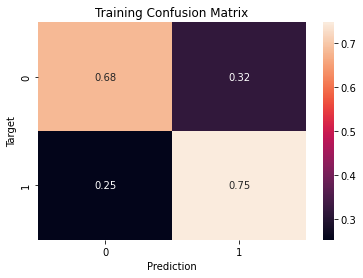

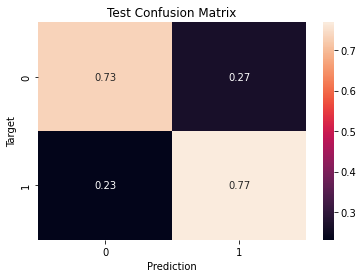

In [32]:
drop_list = ['ID', '12board', 'DOB', 'CollegeID', '10board']
test_percent = 20
predictor(df,drop_list, test_percent, 79)
# 70

# Accuracy achived for 10% testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 71.78988326848248%
Class wise Accuracy of 0: 67.8592725104353
Class wise Accuracy of 1: 75.22123893805309

Accurcy over Test Data:
Accuracy: 77.5%
Class wise Accuracy of 0: 76.88172043010752
Class wise Accuracy of 1: 78.03738317757009



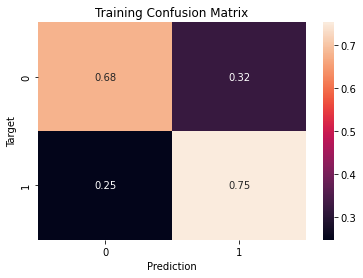

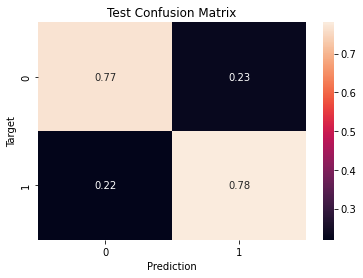

In [36]:
drop_list = ['ID', '12board', '10board']
test_percent = 10
predictor(df,drop_list, test_percent, 79)
# 79

# Accuracy achived for 10% testing with some more drop

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 71.78988326848248%
Class wise Accuracy of 0: 67.8592725104353
Class wise Accuracy of 1: 75.22123893805309

Accurcy over Test Data:
Accuracy: 77.5%
Class wise Accuracy of 0: 76.88172043010752
Class wise Accuracy of 1: 78.03738317757009



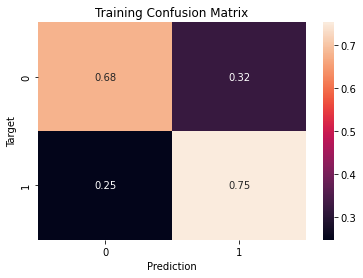

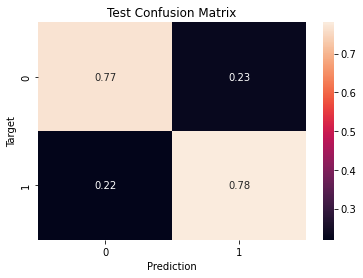

In [34]:
drop_list = ['ID', '12board', 'DOB', 'CollegeID', '10board']
test_percent = 10
predictor(df,drop_list, test_percent, 79)
# 79

# Accuracy achived for 50% testing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Accurcy over Training Data:
Accuracy: 72.73636818409204%
Class wise Accuracy of 0: 69.75763962065332
Class wise Accuracy of 1: 75.42857142857143

Accurcy over Test Data:
Accuracy: 72.13606803401701%
Class wise Accuracy of 0: 71.99124726477024
Class wise Accuracy of 1: 72.25806451612902



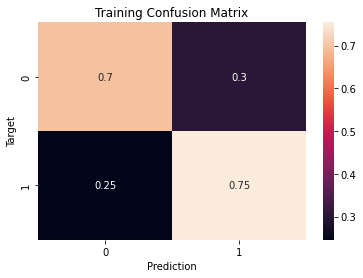

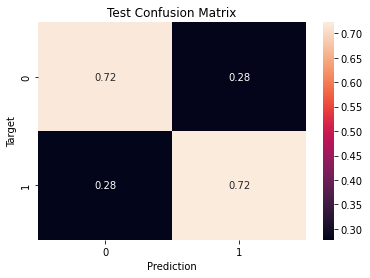

In [35]:
drop_list = ['ID', '12board', 'DOB', 'CollegeID', '10board']
test_percent = 50
Scaling = False
predictor(df,drop_list, test_percent,79)
